import libraries we need it 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import libraries we need it in(models)

In [4]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error ,r2_score ,mean_absolute_error, accuracy_score

Read Data and show it 

In [6]:
df=pd.read_csv("D:/FCDS/Data Sets/Self Study/3 Ecommerce Customers/Ecommerce Customers.csv")
df.head(8)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146


show important featuers

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


check null values

In [10]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

###############################################

put column we work on it in table alone 

In [13]:
T=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]
T.head(8)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146


show correlation between colmuns

In [15]:
T.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


draw regression plot that shows the relationship between each column and column "Yearly Amount Spent" (output)

<Axes: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

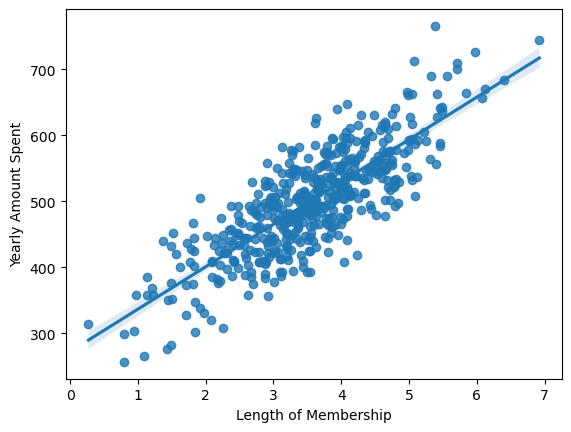

In [17]:
sns.regplot(data=T,x='Length of Membership',y='Yearly Amount Spent')

<Axes: xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

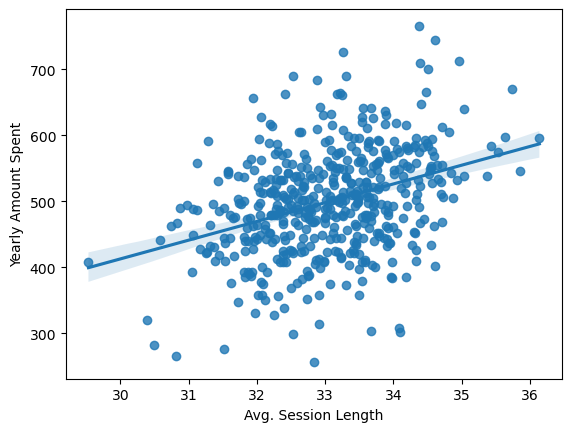

In [18]:
sns.regplot(data=T,x='Avg. Session Length',y='Yearly Amount Spent')

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

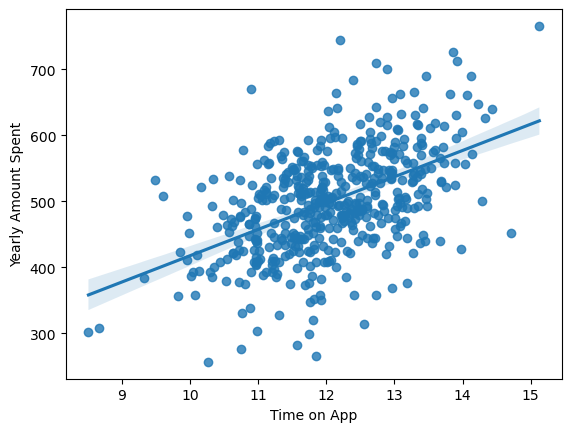

In [19]:
sns.regplot(data=T,x='Time on App',y='Yearly Amount Spent')

its explain the App more important from website 

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

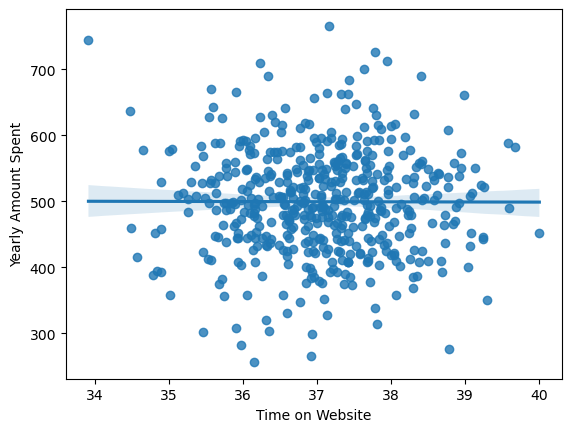

In [21]:
sns.regplot(data=T,x='Time on Website',y='Yearly Amount Spent')

draw box plot to show outlaiers values 

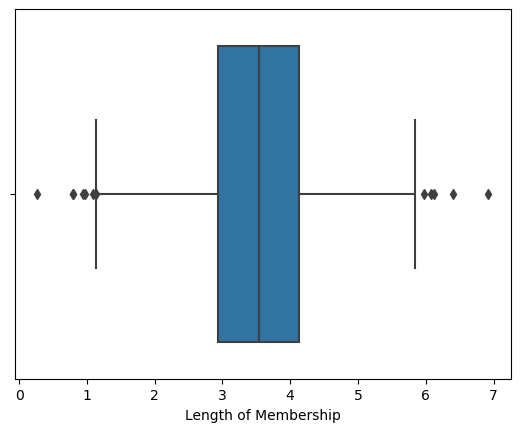

In [23]:
sns.boxplot(x=T['Length of Membership'])
plt.show()

create function to replace outliers to mean and call it when we need 

In [25]:
def replace_outl_mean(df, column_name):
    data = df[column_name]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mean_value = data.mean()
    df.loc[(data < lower_bound) | (data > upper_bound), column_name] =mean_value

recall function to replace outliers values 

In [45]:
replace_outl_mean(T, 'Length of Membership')

C:\Users\moham\AppData\Local\Temp\ipykernel_25280\158243719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(data < lower_bound) | (data > upper_bound), column_name] =mean_value


show box plot after replace outliers values and repeat this process

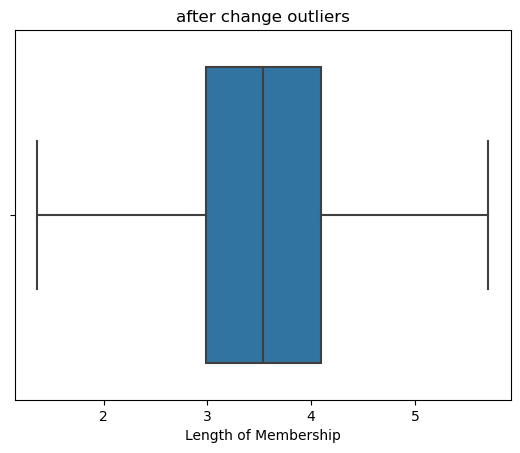

In [48]:
sns.boxplot(x=T['Length of Membership'])
plt.title('after change outliers')
plt.show()

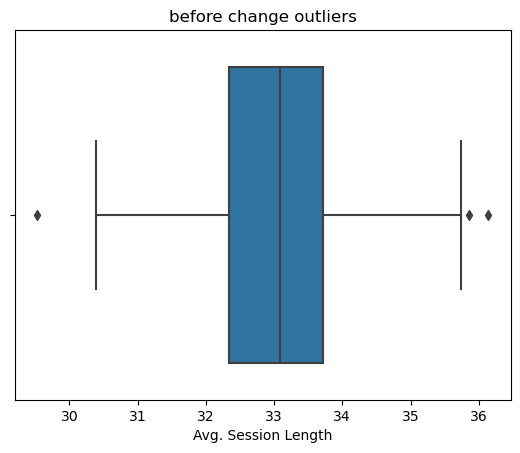

In [50]:
sns.boxplot(x=T['Avg. Session Length'])
plt.title('before change outliers')
plt.show()

In [56]:
replace_outl_mean(T,'Avg. Session Length')

C:\Users\moham\AppData\Local\Temp\ipykernel_25280\158243719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(data < lower_bound) | (data > upper_bound), column_name] =mean_value


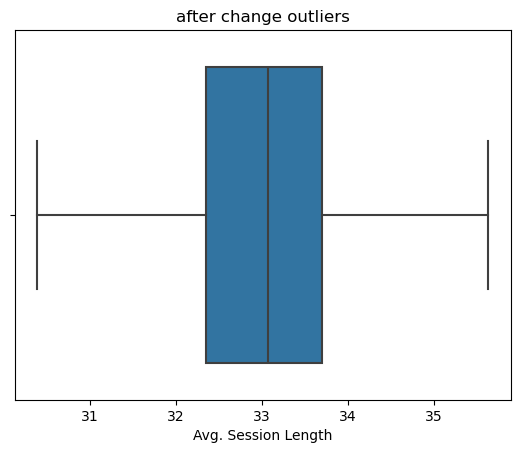

In [58]:
sns.boxplot(x=T['Avg. Session Length'])
plt.title('after change outliers')
plt.show()

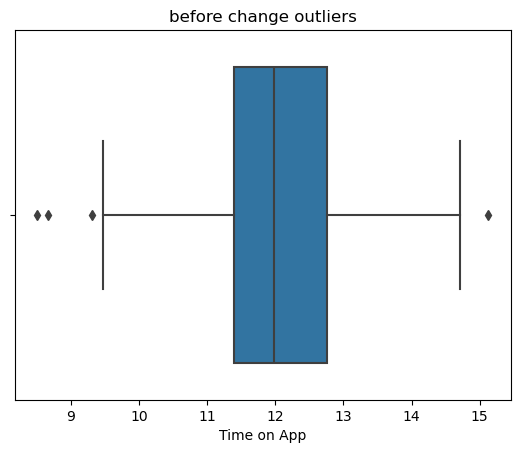

In [60]:
sns.boxplot(x=T['Time on App'])
plt.title('before change outliers')
plt.show()

In [62]:
replace_outl_mean(T,'Time on App')

C:\Users\moham\AppData\Local\Temp\ipykernel_25280\158243719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(data < lower_bound) | (data > upper_bound), column_name] =mean_value


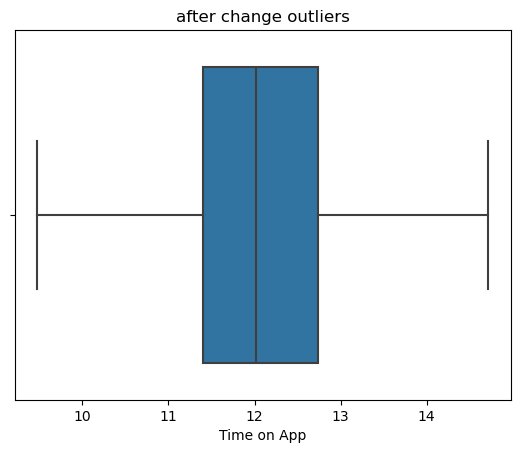

In [64]:
sns.boxplot(x=T['Time on App'])
plt.title('after change outliers')
plt.show()

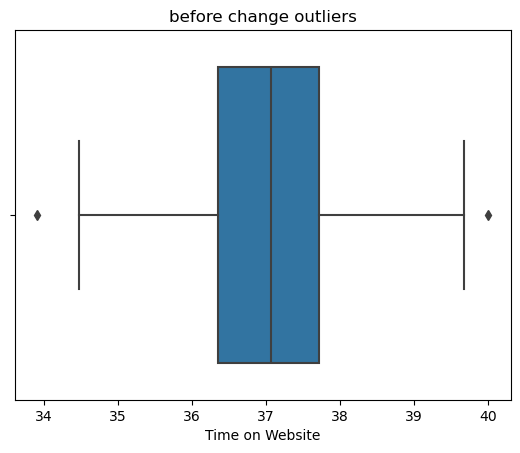

In [66]:
sns.boxplot(x=T['Time on Website'])
plt.title('before change outliers')
plt.show()

In [68]:
replace_outl_mean(T,'Time on Website')

C:\Users\moham\AppData\Local\Temp\ipykernel_25280\158243719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(data < lower_bound) | (data > upper_bound), column_name] =mean_value


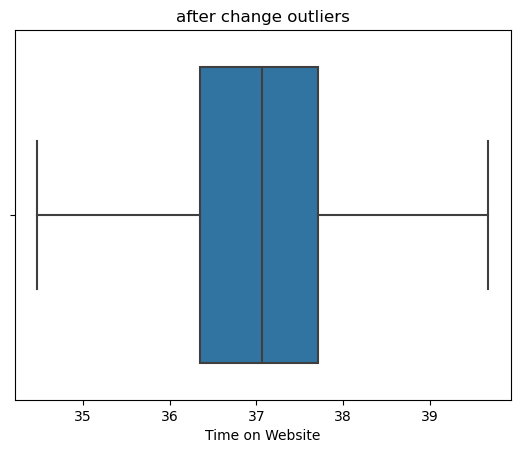

In [70]:
sns.boxplot(x=T['Time on Website'])
plt.title('after change outliers')
plt.show()

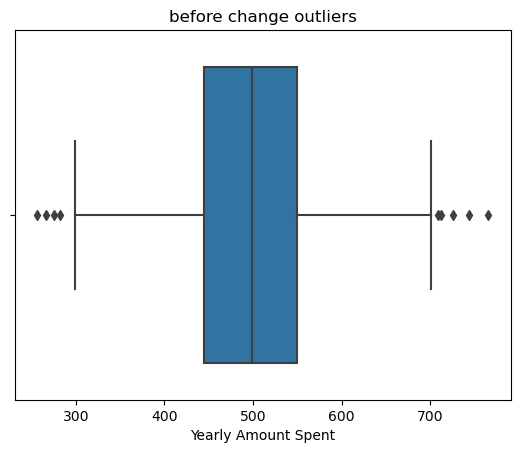

In [72]:
sns.boxplot(x=T['Yearly Amount Spent'])
plt.title('before change outliers')
plt.show()

In [78]:
replace_outl_mean(T,'Yearly Amount Spent')

C:\Users\moham\AppData\Local\Temp\ipykernel_25280\158243719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(data < lower_bound) | (data > upper_bound), column_name] =mean_value


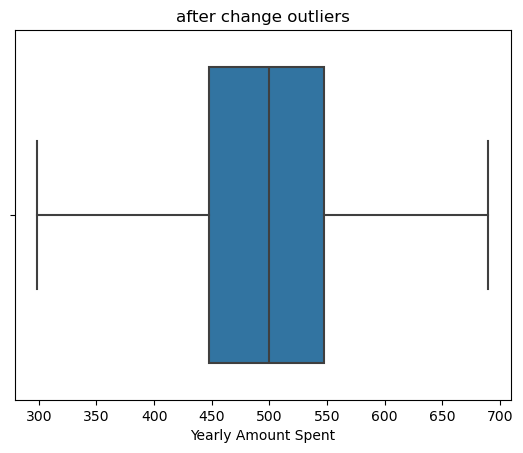

In [80]:
sns.boxplot(x=T['Yearly Amount Spent'])
plt.title('after change outliers')
plt.show()

determaine columns we use it in prediction 

In [83]:
X=T[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


determine column of output to predict it

In [86]:
y=T[['Yearly Amount Spent']]
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


divide the data to be ready for models 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

check the shape of X_train and X_test

In [92]:
X_train.shape, X_test.shape

((350, 4), (150, 4))

use model KNN and calculate R-squared error for all cases that diffrent from each other of K
then the best K is 9

In [98]:
K_values = [1,3,5,7,9]
for K in K_values:
    model_KNN= KNeighborsRegressor(n_neighbors=K)
    model_KNN.fit(X_train, y_train)
    y_pred= model_KNN.predict(X_test)
    
    MAE=mean_absolute_error(y_test, y_pred)
    MSE= mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    #print(MAE)
    #print(MSE)
    print(R2)

0.3285232998255456
0.6604032967102047
0.7123853078962021
0.7137909357321082
0.7142476157080089


###########

calculate R-squared error for all cases that diffrent from each other of metric 
then the best metric is manhattan

In [102]:
dist_metrics = ['euclidean','manhattan','chebyshev']
for metric in dist_metrics:  
    model_KNN= KNeighborsRegressor(n_neighbors=9, metric=metric)
    model_KNN.fit(X_train, y_train)
    y_pred= model_KNN.predict(X_test)
        
    MAE=mean_absolute_error(y_test, y_pred)
    MSE= mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    #print(MAE)
    #print(MSE)
    print(metric)
    print(R2)

euclidean
0.7142476157080089
manhattan
0.7206799564257018
chebyshev
0.7175852963282991


################

use model with best k and best metric 

In [106]:
K=9
metric='manhattan'

In [108]:
model_KNN= KNeighborsRegressor(n_neighbors=K, metric=metric)

In [110]:
model_KNN.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=9)

In [112]:
y_pred = model_KNN.predict(X_test)

calculate mean absolute error

In [115]:
MAE=mean_absolute_error(y_test, y_pred)
MAE

24.089071556179128

calculate mean squared error

In [118]:
MSE= mean_squared_error(y_test, y_pred)
MSE

1349.6886270425375

calculate R-squared

In [121]:
R2 = r2_score(y_test, y_pred)
R2

0.7206799564257018

##############################################################################

use model Support Vector Machine(Regression) 

In [125]:
model_SVR= SVR(kernel='linear',C=1)

In [127]:
y_train = np.ravel(y_train)

In [129]:
model_SVR.fit(X_train,y_train)

SVR(C=1, kernel='linear')

In [131]:
y_pred = model_SVR.predict(X_test)
y_pred

array([406.93214426, 540.50829814, 429.3623575 , 502.5336252 ,
       413.90476336, 566.23978617, 530.63739319, 505.37212579,
       412.99887553, 474.3567796 , 444.46571832, 428.62230431,
       430.06080314, 525.39366257, 434.40049847, 428.08018135,
       572.59347939, 486.26491833, 460.61373163, 482.40521385,
       501.50720118, 512.67947365, 507.63020145, 638.5883702 ,
       452.88635121, 496.88938921, 552.06347854, 552.28796655,
       404.56824746, 335.06834658, 530.79701725, 478.55062507,
       500.94676901, 475.66492873, 504.85823834, 485.13502602,
       518.51789332, 441.89759783, 458.51086076, 472.1517668 ,
       494.78206593, 448.94155396, 508.64725029, 500.9986747 ,
       489.02396177, 533.48837149, 588.73642137, 512.8460158 ,
       291.38282667, 436.67767701, 424.69469159, 482.31864234,
       578.99444031, 602.17507292, 561.37795418, 495.59413885,
       400.59724617, 459.75048045, 569.24616391, 498.27524877,
       512.299579  , 398.04801839, 480.08396851, 482.51

calculate mean absolute error

In [134]:
MAE=mean_absolute_error(y_test, y_pred)
MAE

15.497353786508608

calculate mean squared error 

In [137]:
MSE = mean_squared_error(y_test, y_pred)
MSE

1268.1994170183305

caculate R-squared error

In [140]:
R2 = r2_score(y_test, y_pred)
R2

0.7375442681185936

we use GridSearchCV to found best parameters 

In [143]:
parameters_values = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]  
}
grid_search= GridSearchCV(SVR(), parameters_values, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [144]:
best_model_SVR = grid_search.best_estimator_

use best parameters in perediction 

In [146]:
y_pred = best_model_SVR.predict(X_test)

In [147]:
MAE=mean_absolute_error(y_test, y_pred)
MAE

18.349241118962606

In [148]:
MSE = mean_squared_error(y_test, y_pred)
MSE

1104.6907717316792

In [156]:
R2 = r2_score(y_test, y_pred)
R2

0.7713826223961411

the parameters is actually good becuase the R2 is increased 

############################################################

caculate min value of column Yearly Amount Spent (output)

In [161]:
T['Yearly Amount Spent'].min()

298.76200786180766

caculate max value of column Yearly Amount Spent (output)

In [164]:
T['Yearly Amount Spent'].max()

689.7876041747194

divide output(target) to clusters becuase model Naive Bayes dont accept continuous output

In [167]:
T['Yearly Amount Spent'] = pd.cut(T['Yearly Amount Spent'], bins=[0,489,690], labels=[0, 1])

C:\Users\moham\AppData\Local\Temp\ipykernel_25280\2200909440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['Yearly Amount Spent'] = pd.cut(T['Yearly Amount Spent'], bins=[0,489,690], labels=[0, 1])


save changes in variable y 

In [170]:
y=T[['Yearly Amount Spent']]
y

,Yearly Amount Spent
0,1
1,0
2,0
3,1
4,1
...,...
495,1
496,1
497,1
498,0


divide data again to prepare

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

use model Naive Bayes

In [176]:
model_NB = GaussianNB()

In [178]:
model_NB.fit(X_train, y_train)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [180]:
y_pred = model_NB.predict(X_test)

In [182]:
acc = accuracy_score(y_test, y_pred)
acc

0.83

we use 3 models (KNN - SVR - Naive Bayes) and we change in output when use Naive Bayes 
and the comparison between (KNN - SVR) its the SVR(%77) is better 
but model Naive Bayes have accuarce %83 for if we dont care about this factors (change in output) the Naive Bayes is best model we use 